# TASK 1 : Stock Prediction : To predict stock price of a company using LSTM (Long Short Term Memory)  
  

### Done by **Faizal Hussain** as a part of Bharat Intern DataScience Internship


### ABOUT DATASET

This Dataset Contains the Historical Share Price of **Tata Consultancy Services ltd(TCS)** From 2004 to 2002.  
This Dataset Contains seven columns  
Date-- Date includes day and month and year  
open -- open value of the TCS stock price on particular day  
High -- high price value of TCS on particular day  
LOW -- Low Price Value Of ITC on particular day  
Close --Stock Price of TCS After Closing The Stock Market  
Volume -- Volume of TCS means sum of buy's and shares  
Adjclose --Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions  

The dataset is available at Kaggle : https://www.kaggle.com/datasets/saikumartamminana/tcs-stock-price-prediction

#### Importing necessary libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

#### Reading and pre-processing of Dataset

In [28]:
df=pd.read_csv("TCS1.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [29]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
4493,2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3161.699951,260949.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [31]:
df.shape

(4494, 7)

In [32]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,4486.0,1.146183e+03,9.940701e+02,112.000000,2.906937e+02,9.774500e+02,1.564775e+03,4.033950e+03
High,4486.0,1.158538e+03,1.003011e+03,116.112503,2.953000e+02,9.950000e+02,1.597287e+03,4.043000e+03
Low,4486.0,1.132825e+03,9.840434e+02,103.837502,2.859313e+02,9.702500e+02,1.548663e+03,3.980000e+03
Close,4486.0,1.145521e+03,9.933465e+02,111.550003,2.902750e+02,9.813375e+02,1.576781e+03,4.019150e+03
Adj Close,4486.0,1.049457e+03,9.920626e+02,86.565590,2.199027e+02,8.206278e+02,1.443632e+03,3.964503e+03
Volume,4486.0,3.620596e+06,3.162368e+06,0.000000,1.942489e+06,2.804749e+06,4.297410e+06,8.806715e+07


#### Sorting the data

#### 

In [34]:
# checking for null values
df.isnull().sum()

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64

In [35]:
#dropping null values
df=df.dropna()


In [36]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [37]:
#check for duplicates
df.duplicated().sum()

0

In [38]:
#sorting the data
sort=df.sort_values(by='Date')
sort.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [39]:
#resetting the index to start from 0
sort.reset_index(inplace=True)
sort.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


### Data Visualization

#### Plot for Date and close fields

Text(0.5, 1.0, 'Date vs Close')

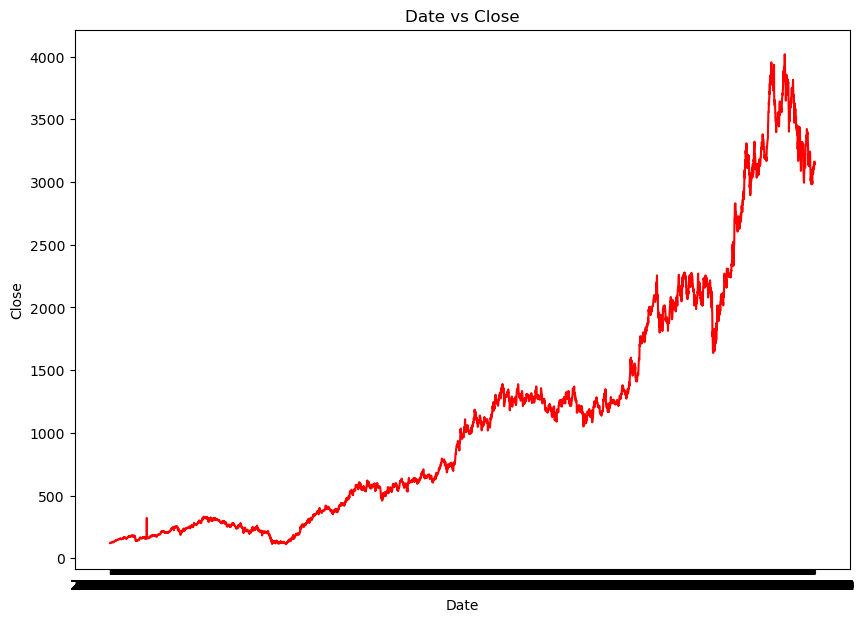

In [43]:
plt.figure(figsize=(10,7))
plt.plot(sort['Date'],sort['Close'],c='r')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title("Date vs Close")

In [44]:
#sorting the **close** attribute because this attribute will be used later for prediction
close_sort = sort['Close']
close_sort

0        120.332497
1        123.345001
2        123.512497
3        123.487503
4        124.207497
           ...     
4481    3144.699951
4482    3121.850098
4483    3157.300049
4484    3137.399902
4485    3161.699951
Name: Close, Length: 4486, dtype: float64

#### Feature Scaling

In [45]:
#since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform values between 0 and 1
scale = MinMaxScaler(feature_range=(0,1))
close_sort = scale.fit_transform(np.array(close_sort).reshape(-1,1))
close_sort

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.77944266],
       [0.77434998],
       [0.78056864]])

#### Testing and Training

In [46]:
train_size = int(len(close_sort)*0.7)
test_size= len(close_sort) - train_size
train_data,test_data = close_sort[0:train_size,:],close_sort[train_size:len(close_sort),:1]

In [47]:
train_data

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.27351187],
       [0.2740813 ],
       [0.28227684]])

In [48]:
test_data

array([[0.28562931],
       [0.29597451],
       [0.29225739],
       ...,
       [0.77944266],
       [0.77434998],
       [0.78056864]])

In [49]:
train_data.shape

(3140, 1)

In [50]:
test_data.shape

(1346, 1)

#### converting array of values to a dataset matrix

In [51]:
def matrix_conversion(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

#### Reshaping the dataset

In [52]:
time_step = 100
X_train,y_train = matrix_conversion(train_data,time_step)
X_test,y_test = matrix_conversion(test_data,time_step)

In [53]:
X_train.shape

(3039, 100)

In [54]:
y_train.shape

(3039,)

In [55]:
X_test.shape

(1245, 100)

In [56]:
y_test.shape

(1245,)

In [57]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [60]:
X_train

array([[[0.00224754],
        [0.00301848],
        [0.00306134],
        ...,
        [0.01297664],
        [0.01281157],
        [0.01292353]],

       [[0.00301848],
        [0.00306134],
        [0.00305494],
        ...,
        [0.01281157],
        [0.01292353],
        [0.01186342]],

       [[0.00306134],
        [0.00305494],
        [0.0032392 ],
        ...,
        [0.01292353],
        [0.01186342],
        [0.01188261]],

       ...,

       [[0.25392826],
        [0.26054357],
        [0.26353132],
        ...,
        [0.27118308],
        [0.27247544],
        [0.26990352]],

       [[0.26054357],
        [0.26353132],
        [0.26433104],
        ...,
        [0.27247544],
        [0.26990352],
        [0.27207877]],

       [[0.26353132],
        [0.26433104],
        [0.27078003],
        ...,
        [0.26990352],
        [0.27207877],
        [0.27351187]]])

In [61]:
X_test

array([[[0.28562931],
        [0.29597451],
        [0.29225739],
        ...,
        [0.28233444],
        [0.28451607],
        [0.28546936]],

       [[0.29597451],
        [0.29225739],
        [0.29535395],
        ...,
        [0.28451607],
        [0.28546936],
        [0.28612832]],

       [[0.29225739],
        [0.29535395],
        [0.29411915],
        ...,
        [0.28546936],
        [0.28612832],
        [0.29138732]],

       ...,

       [[0.79726687],
        [0.80605746],
        [0.83521857],
        ...,
        [0.76456136],
        [0.76778587],
        [0.77621815]],

       [[0.80605746],
        [0.83521857],
        [0.83242916],
        ...,
        [0.76778587],
        [0.77621815],
        [0.7703706 ]],

       [[0.83521857],
        [0.83242916],
        [0.83008753],
        ...,
        [0.77621815],
        [0.7703706 ],
        [0.77944266]]])

#### Creating the LSTM model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [64]:
# creating LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Prediction and Performance Check

In [66]:
model.fit(X_train, y_train,validation_split=0.1,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
43/43 [==============================] - 11s 152ms/step - loss: 0.0017 - val_loss: 7.0065e-04
Epoch 2/100
43/43 [==============================] - 6s 132ms/step - loss: 8.2600e-05 - val_loss: 1.5781e-04
Epoch 3/100
43/43 [==============================] - 6s 132ms/step - loss: 5.5072e-05 - val_loss: 1.3993e-04
Epoch 4/100
43/43 [==============================] - 6s 130ms/step - loss: 5.1514e-05 - val_loss: 1.5792e-04
Epoch 5/100
43/43 [==============================] - 6s 129ms/step - loss: 5.3848e-05 - val_loss: 1.3588e-04
Epoch 6/100
43/43 [==============================] - 6s 129ms/step - loss: 4.9923e-05 - val_loss: 1.5206e-04
Epoch 7/100
43/43 [==============================] - 6s 130ms/step - loss: 5.0483e-05 - val_loss: 1.4660e-04
Epoch 8/100
43/43 [==============================] - 6s 128ms/step - loss: 5.1819e-05 - val_loss: 1.2772e-04
Epoch 9/100
43/43 [==============================] - 5s 123ms/step - loss: 5.0378e-05 - val_loss: 1.2588e-04
Epoch 10/100
43/43 [==

In [67]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

39/39 [==============================] - 1s 26ms/step


In [68]:
train_predict = scale.inverse_transform(train_predict)
test_predict = scale.inverse_transform(test_predict)

#### Performace Calculation

In [69]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

736.4256638050169

In [70]:
math.sqrt(mean_squared_error(y_test,test_predict))

2490.757319020962

#### Plotting graph with predicted train data and test data with actual data

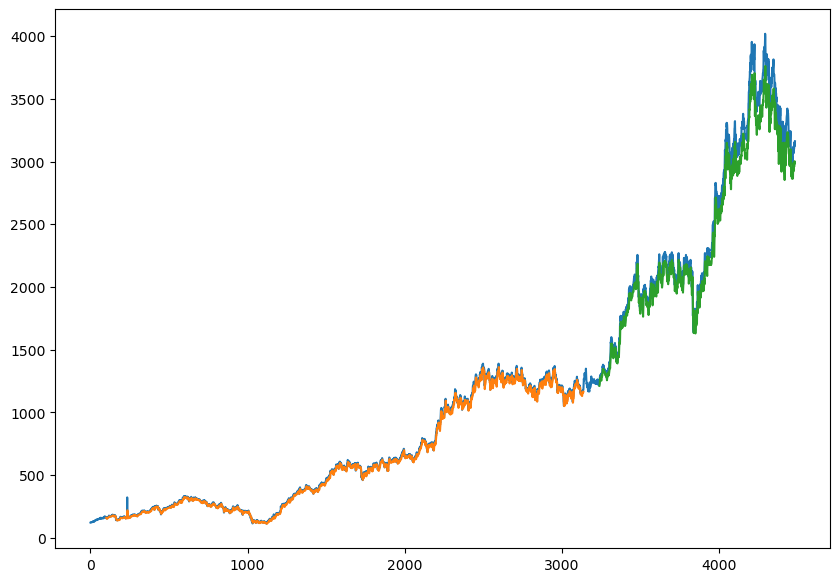

In [71]:
look_back=100
#shift train predictions for plotting
trainPredictPlot = np.empty_like(close_sort)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
#plot the prediction
testPredictPlot = np.empty_like(close_sort)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_sort)-1,:] = test_predict
#BASELINE AND PREDICTION
plt.figure(figsize=(10,7))
plt.plot(scale.inverse_transform(close_sort))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### Prediction for next 30 days

In [73]:
len(test_data)


1346

In [102]:
#pred_input
x_input=test_data[1246:].reshape(1,-1)
x_input.shape

(1, 100)

In [103]:
#temp_input
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
temp_input

[0.8300875299004096,
 0.8474383464508324,
 0.8518272046869044,
 0.8494728308416306,
 0.8320068666272631,
 0.8426143883980073,
 0.8484876089408456,
 0.8312903017095712,
 0.7953859594978968,
 0.7930699473078269,
 0.7919823231626099,
 0.7755271970847187,
 0.7619382679792622,
 0.7679521897234034,
 0.7934281984175063,
 0.7962432256168916,
 0.8182132584296087,
 0.8141954594210618,
 0.8197231115754002,
 0.8206059939300864,
 0.8135300642764194,
 0.8075417587679694,
 0.8198255138198323,
 0.7993397806155486,
 0.7945414387984147,
 0.8059166952599002,
 0.8128519237122643,
 0.8071194670690618,
 0.7683105035314158,
 0.7608634519518908,
 0.7491043281450346,
 0.7388678656018155,
 0.7378058576922897,
 0.7554381393436513,
 0.7581891886521415,
 0.7813619932740201,
 0.7845608878187761,
 0.7829486324285525,
 0.7818610082833355,
 0.7688478801959351,
 0.7875166789177972,
 0.8058527173690051,
 0.8164474310219035,
 0.8156541427938039,
 0.8138627618487406,
 0.8260697308918626,
 0.8300235520095144,
 0.8326082838

In [105]:
#prediction for 30 days
from numpy import array
lst_output=[] # predicted 30 days output
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        print("Size of x_input:", x_input.size)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.7408876]
101
1 day input [0.84743835 0.8518272  0.84947283 0.83200687 0.84261439 0.84848761
 0.8312903  0.79538596 0.79306995 0.79198232 0.7755272  0.76193827
 0.76795219 0.7934282  0.79624323 0.81821326 0.81419546 0.81972311
 0.82060599 0.81353006 0.80754176 0.81982551 0.79933978 0.79454144
 0.8059167  0.81285192 0.80711947 0.7683105  0.76086345 0.74910433
 0.73886787 0.73780586 0.75543814 0.75818919 0.78136199 0.78456089
 0.78294863 0.78186101 0.76884788 0.78751668 0.80585272 0.81644743
 0.81565414 0.81386276 0.82606973 0.83002355 0.83260828 0.83501383
 0.82984443 0.84731039 0.84194906 0.83968421 0.84183391 0.83675404
 0.83790564 0.82992121 0.81202021 0.8045348  0.79502765 0.79605129
 0.77310885 0.79322346 0.7728913  0.7725586  0.77332633 0.77170133
 0.77747215 0.78260313 0.79488688 0.80136146 0.7978811  0.76999948
 0.76589215 0.74141417 0.74655802 0.749501   0.73949484 0.74108148
 0.73459416 0.73775463 0.7436534  0.74831098 0.73849681 0.74035217
 0.73533627 0.76251407 0.76527793 

#### Plotting last 130 days closing price

In [116]:
#plotting last 130 days closing price
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [117]:
len(close_sort)

4486

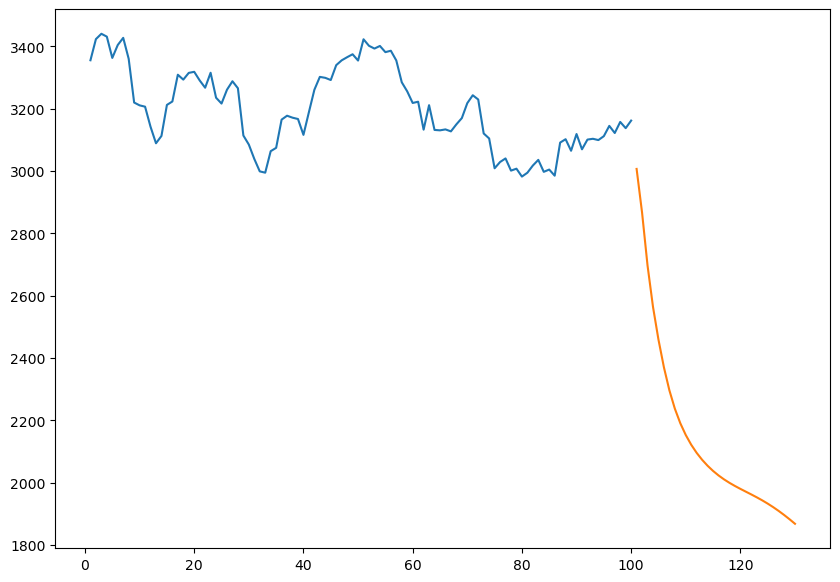

In [122]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scale.inverse_transform(close_sort[4386:]))
plt.plot(day_pred,scale.inverse_transform(lst_output))


#### Appending done for continuous graph

In [124]:
app=close_sort.tolist()
#adding specified list of predicted 30 days output at the end of last 100 days output
app.extend(lst_output)

In [125]:
len(app)

4516

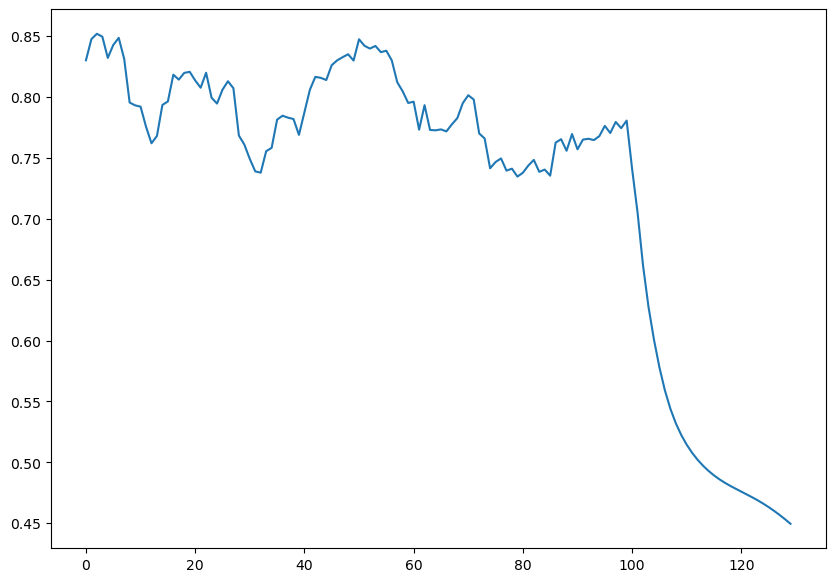

In [126]:
plt.figure(figsize=(10,7))
plt.plot(app[4386:])# latesr 100 days output

#### plotting the graph with 30days predicted output

In [130]:
#undoin scaling of app
app=scale.inverse_transform(app).tolist()

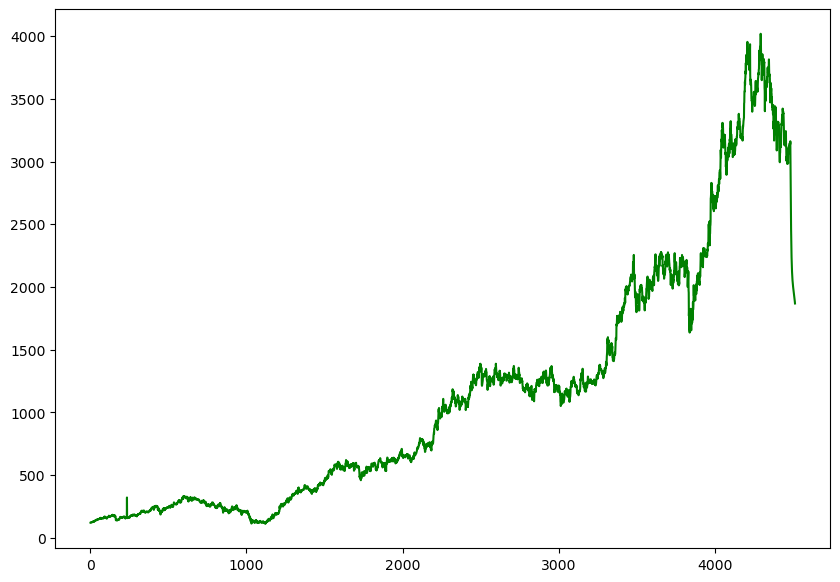

In [131]:
plt.figure(figsize=(10,7))
plt.plot(app,c='g')